In [52]:
# 네이버 블로그 키워드 분석
from pyparsing.helpers import original_text_for
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개
sort = 'sim'  #유사도순으로 정렬

blog_df = pd.DataFrame(columns=('Title','Link','Description','Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      blog_df.loc[idx] = [title, link, description , blogger_name,blogger_link]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
blog_df

검색 질의: 인천여행|청소년|방학


,Title,Link,Description,Blogger Name,Blogger Link
0,"인천문화예술회관, 여름 방학 시즌 청소년 음악회",https://blog.naver.com/artspr/222441137886,여름방학을 맞이해 인천문화예술회관에서 엄선한 6개의 청소년 음악회 즐거워야 할 여름...,인천문화예술회관,blog.naver.com/artspr
1,[청소년인문학여행26]24일차 파리-인천,https://blog.naver.com/sunmiroh/222848227662,2022.8.12(금) 파리--&gt; 인천 여름방학 스페이스꿈틀 청소년유럽인문학여...,건강이 최고의 투자!,blog.naver.com/sunmiroh
2,여름방학 체험기회/근현대사 역사교육/인천 서구청소년센터...,https://blog.naver.com/godqhrgkwk38/222848446553,답사여행을 바로 가는 게 아니라 가기 전에 오리엔테이션과 안전교육을 비롯하여 이론수...,인생초보김선생의 인생터널탈출기,blog.naver.com/godqhrgkwk38
3,여름방학맞이 인천하늘수 역사여행 -송현배수지 제수변실,https://blog.naver.com/incheonsudoin/222846576468,"과거 인천의 모습을 직접 보고 체험할 수 있습니다. 입장료는 성인 1,000원, 청...",인천광역시상수도사업본부,blog.naver.com/incheonsudoin
4,"동부 명문대학 투어 2022년 여름방학, 청소년 &amp; 학부모 동행 여행",https://blog.naver.com/dasundoye/222735873325,2022년 여름방학을 맞아 청소년과 학부모가 함께 미국 명문 아이비리그 대학교와 동...,e교육정보채널,blog.naver.com/dasundoye
...,...,...,...,...,...
995,송도영어과외 송도수학과외 초등 중등 고등 여름방학 내신대비...,https://blog.naver.com/921205kim/221605373198,"해외에 여행을 가거나, 국내 각종 휴양지를 소중한 연인,가족,친구들과 보내고 있을거...",노을이의 과외이야기,blog.naver.com/921205kim
996,라성에서 온 편지 1,https://blog.naver.com/jbkim1288/150089248703,그는 세계여행을 좋아해 방학 때면 꼭 보따리를 챙겨 세계 곳곳을 여행하며 견문을 넓...,석산농원,blog.naver.com/jbkim1288
997,"정남진 장흥 물축제, 여름축제로 최고!!!",https://blog.naver.com/tcacyc/221597989061,그래서 올해는 산이나 정적인 느낌이 있는 여행지 말고 시원하고 신나는 여름축제나 그...,일상탈출,blog.naver.com/tcacyc
998,[서울시민대학 ]시민자치 전문교육과정:: 체험학습의 힐링 캠프,https://blog.naver.com/river5500/152251521,주셨어요 ▶ 청소년 체험학습 지도자 양성과정(구룡중학교 김학경 선생님) ▶ 예비학부...,소셜미디어 청계킴의 대박나라,blog.naver.com/river5500


In [53]:
blog = []
for b in blog_df.Description:
  blog.append(b)


print(blog[:5])

['여름방학을 맞이해 인천문화예술회관에서 엄선한 6개의 청소년 음악회 즐거워야 할 여름방학이지만, 코로나19로 인해 여행도 체험도 쉽지 않은 청소년과 가족들을 위해 인천문화예술회관에서 엄선한 6개의... ', '2022.8.12(금) 파리--&gt; 인천 여름방학 스페이스꿈틀 청소년유럽인문학여행 서유럽남유럽코스에 함께 해주신 모든 청소년 참가자들과 보호자분들에게 진심으로 감사인사를 드립니다. 년간의 코로나 상황의 공백을... ', '답사여행을 바로 가는 게 아니라 가기 전에 오리엔테이션과 안전교육을 비롯하여 이론수업을 받고... @인생초보김선생 #초등생의여름방학체험기회_근현대사역사교육_인천서구청소년센터그날의기억... ', '과거 인천의 모습을 직접 보고 체험할 수 있습니다. 입장료는 성인 1,000원, 청소년(13세~18세) 700원... 이 모두가 수도국산 안에 있으니 이번 여름 방학에 수도국산을 찾아 인천 수돗물의 역사를 들여다보는 것은... ', '2022년 여름방학을 맞아 청소년과 학부모가 함께 미국 명문 아이비리그 대학교와 동부 명문... 약1$, 여행자보험(1-2만원) 현지 입국 전 신속 항원검사 영문 음성 결과서 혹은 PCR검사비, 현지 개인 사용... ']


In [73]:
stop_words = '아이 중국 지역 영어 동안 모집 시작 할인 계획 어른 국제 배낭 오후 집 일본 차 천 회 기간 출발 이용 한국 해외 진행 대상 무료 운영 준비 대학생 기획 전국 특별 인천광역시 미국 서울 해외여행 겨울 유럽 세 성인 싱 금 파리 프로 듀 한국인 최초 항해사 환경 지구 랩 프로 듀 그린피스 인천 이곳 청소년 공간 다누 이달 휴먼 여름 방학 회관 엄선 개 코로나 북 길 호 티 웨이 후 운항 말씀 스케줄 후 여행 일 월 시간 공항 도착 나 년 때 수 시 날 만 분 비행기 것 정 거 전 번 이번 우리 박 곳 내 중 정도 리 이상 자리 거리 위치 유명 서쪽 소개 주 원 층 등 끝 게 명 저'
stop_words = stop_words.split(' ')
print(stop_words)

['아이', '중국', '지역', '영어', '동안', '모집', '시작', '할인', '계획', '어른', '국제', '배낭', '오후', '집', '일본', '차', '천', '회', '기간', '출발', '이용', '한국', '해외', '진행', '대상', '무료', '운영', '준비', '대학생', '기획', '전국', '특별', '인천광역시', '미국', '서울', '해외여행', '겨울', '유럽', '세', '성인', '싱', '금', '파리', '프로', '듀', '한국인', '최초', '항해사', '환경', '지구', '랩', '프로', '듀', '그린피스', '인천', '이곳', '청소년', '공간', '다누', '이달', '휴먼', '여름', '방학', '회관', '엄선', '개', '코로나', '북', '길', '호', '티', '웨이', '후', '운항', '말씀', '스케줄', '후', '여행', '일', '월', '시간', '공항', '도착', '나', '년', '때', '수', '시', '날', '만', '분', '비행기', '것', '정', '거', '전', '번', '이번', '우리', '박', '곳', '내', '중', '정도', '리', '이상', '자리', '거리', '위치', '유명', '서쪽', '소개', '주', '원', '층', '등', '끝', '게', '명', '저']


In [74]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['문화예술', '음악회', '체험', '가족', '문화예술', '스페이스', '인문학', '서유럽', '남유럽', '코스']

In [75]:
from collections import Counter
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'캠프': 230,
 '어린이': 169,
 '체험': 166,
 '문화': 109,
 '프로그램': 98,
 '학교': 78,
 '교육': 75,
 '가족': 69,
 '활동': 69,
 '학생': 67,
 '박물관': 66,
 '음악회': 58,
 '도서관': 56,
 '센터': 53,
 '중학생': 49,
 '음악': 49,
 '친구': 44,
 '예술': 40,
 '세계': 39,
 '초등': 38,
 '클래식': 36,
 '공연': 36,
 '일정': 35,
 '추천': 35,
 '학습': 34,
 '아동': 34,
 '사진': 33,
 '국내': 32,
 '생각': 32,
 '요금': 32,
 '간': 31,
 '관': 31,
 '학년': 31,
 '입장료': 30,
 '연수': 30,
 '단체': 30,
 '부모': 30,
 '참가': 29,
 '안내': 29,
 '가능': 29,
 '토': 29,
 '관람': 29,
 '코스': 28,
 '역사': 28,
 '주말': 28,
 '독서': 28,
 '경기': 28,
 '뎀': 27,
 '꿈': 27,
 '과학관': 27,
 '해설': 27,
 '나라': 26,
 '부산': 26,
 '대학': 26,
 '이하': 26,
 '과학': 26,
 '교실': 26,
 '체험학습': 26,
 '장': 25,
 '봉사': 25,
 '탐방': 25,
 '책': 25,
 '고등학생': 25,
 '시즌': 25,
 '수업': 24,
 '가치': 24,
 '축제': 24,
 '장소': 23,
 '문의': 23,
 '일반': 23,
 '팀': 23,
 '국립': 22,
 '오늘': 22,
 '초': 22,
 '초등학생': 22,
 '대학교': 21,
 '신청': 21,
 '학원': 21,
 '개최': 21,
 '강화': 21,
 '수련': 21,
 '사람': 21,
 '인문학': 20,
 '탄': 20,
 '제공': 20,
 '아침': 20,
 '마음': 20,
 '경우': 20,
 '이야기': 20,
 '휴가': 2

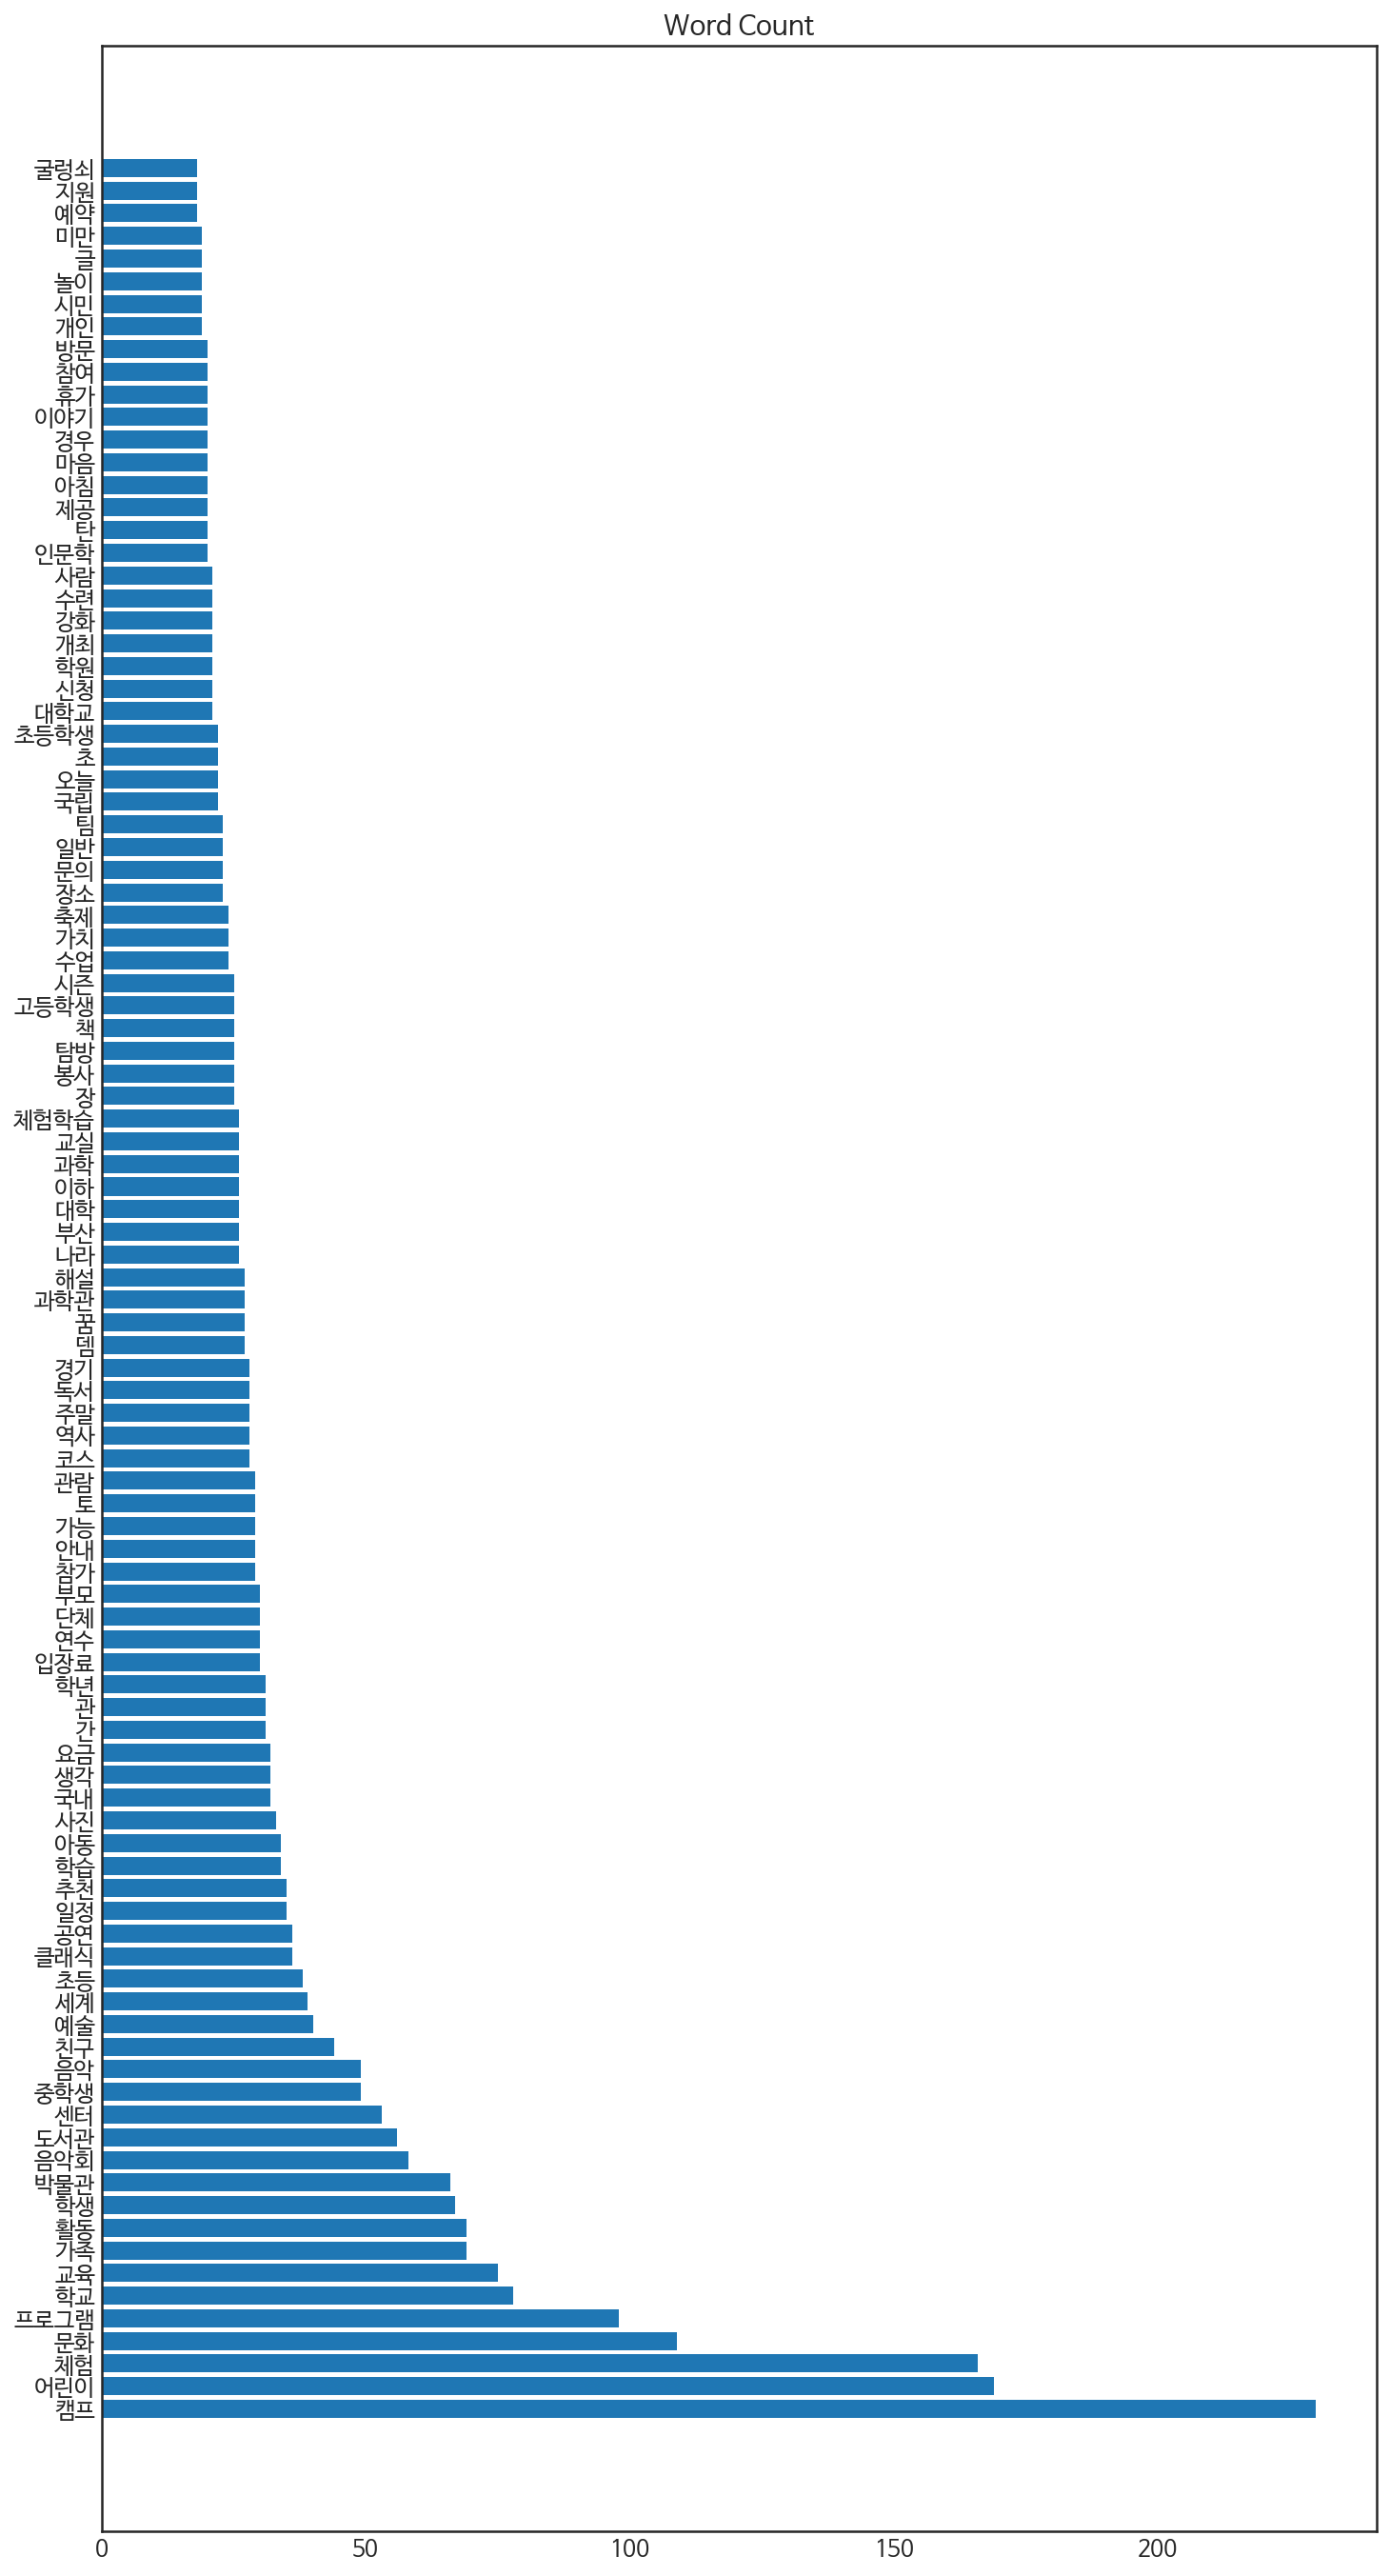

In [76]:
#단어 빈도 시각화
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos,top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_blog_nouns.keys())
plt.show()

In [64]:
#!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


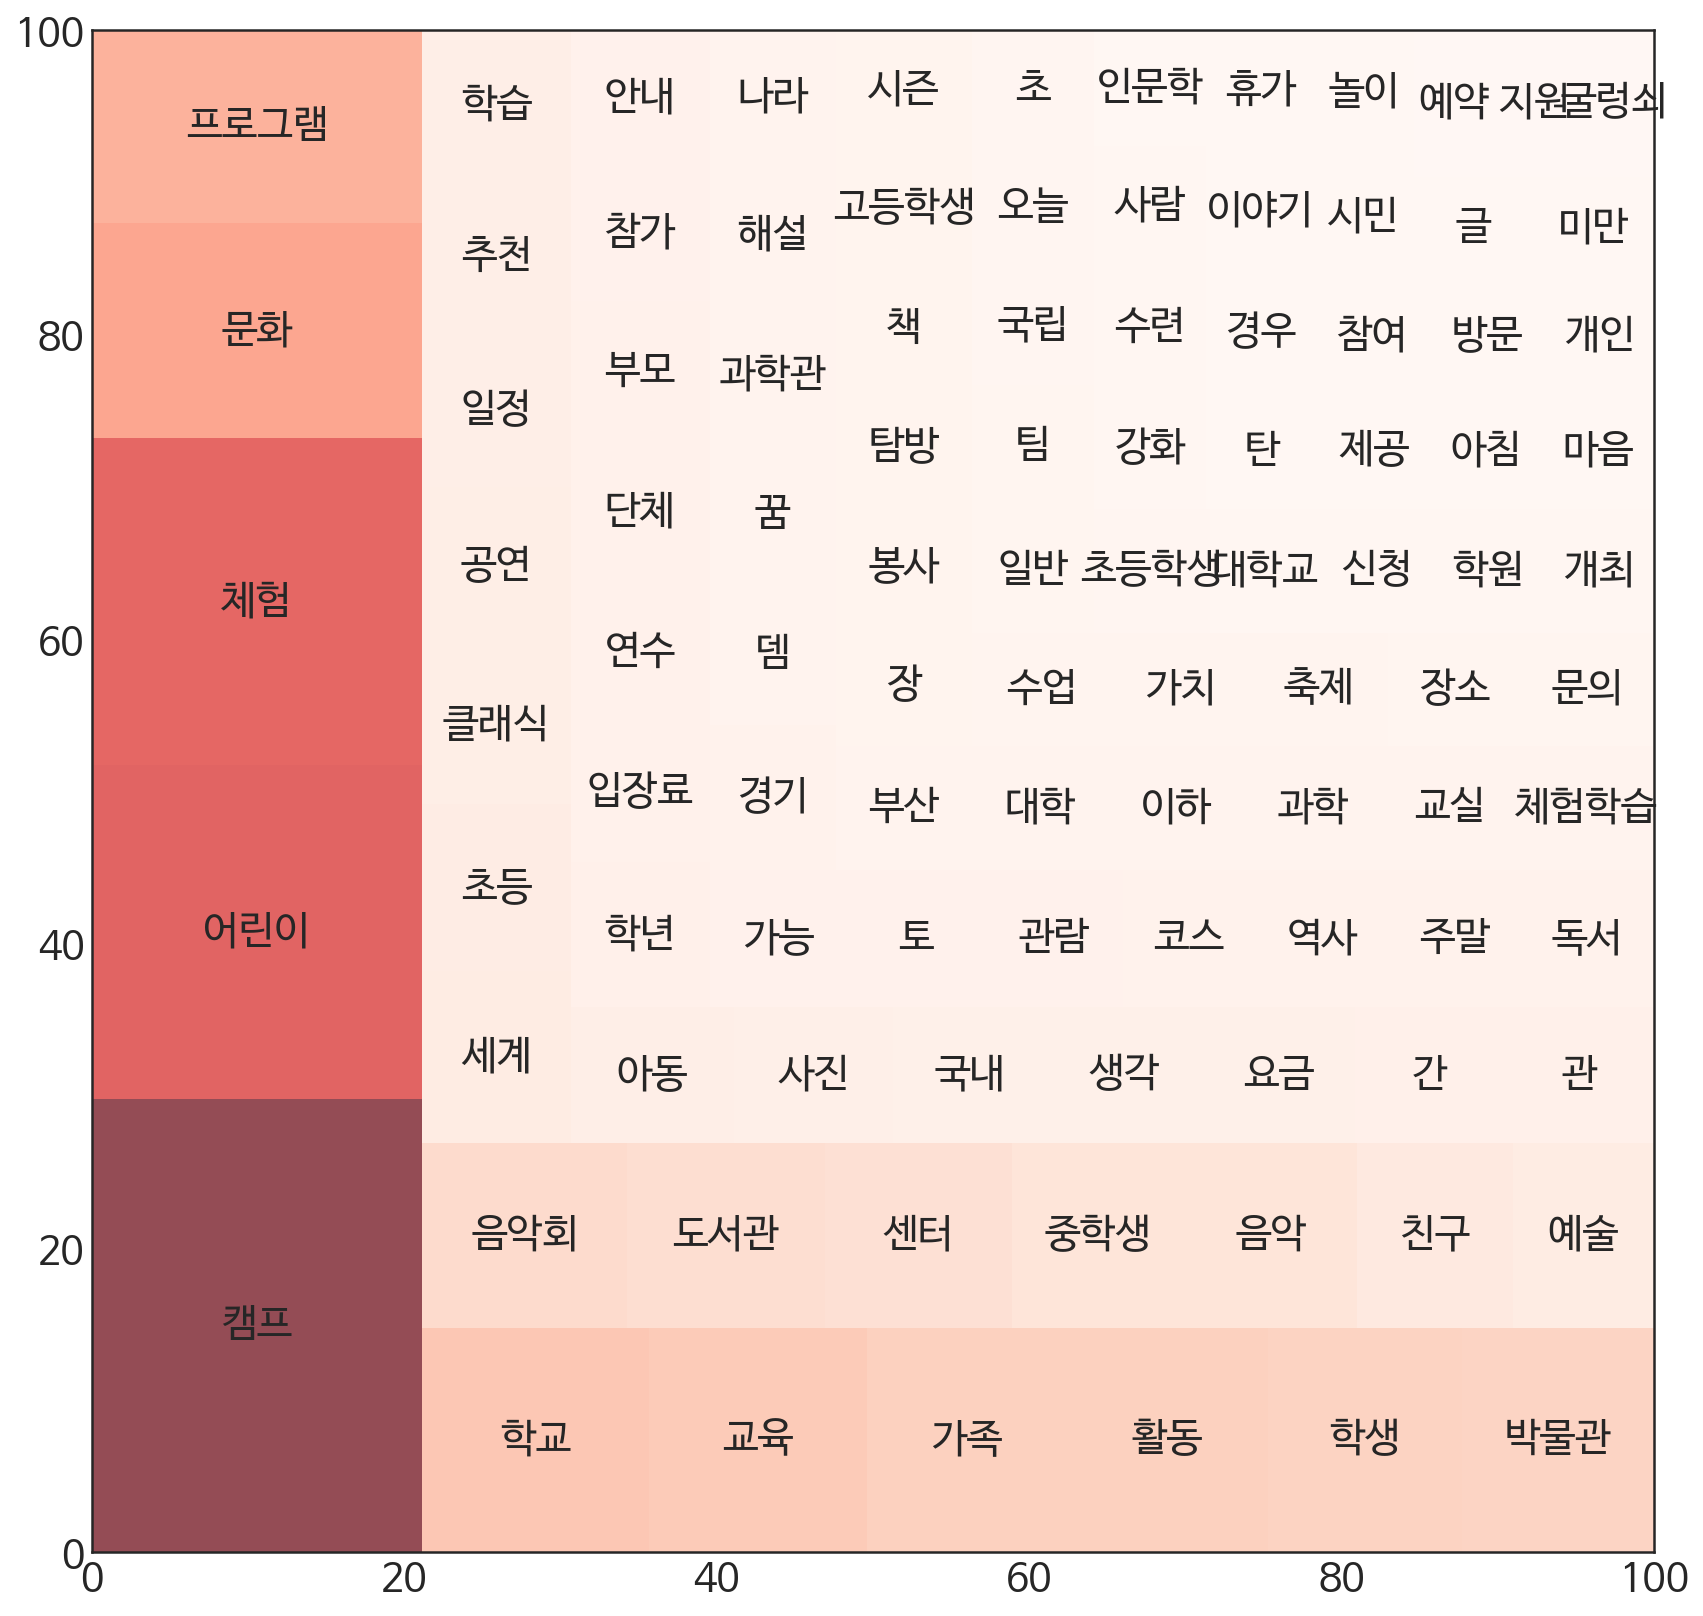

In [77]:
import squarify
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_blog_nouns.values()), 
                            vmax = max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label = top_blog_nouns.keys(),
              sizes= top_blog_nouns.values(),
              color = colors,
              alpha =.7);


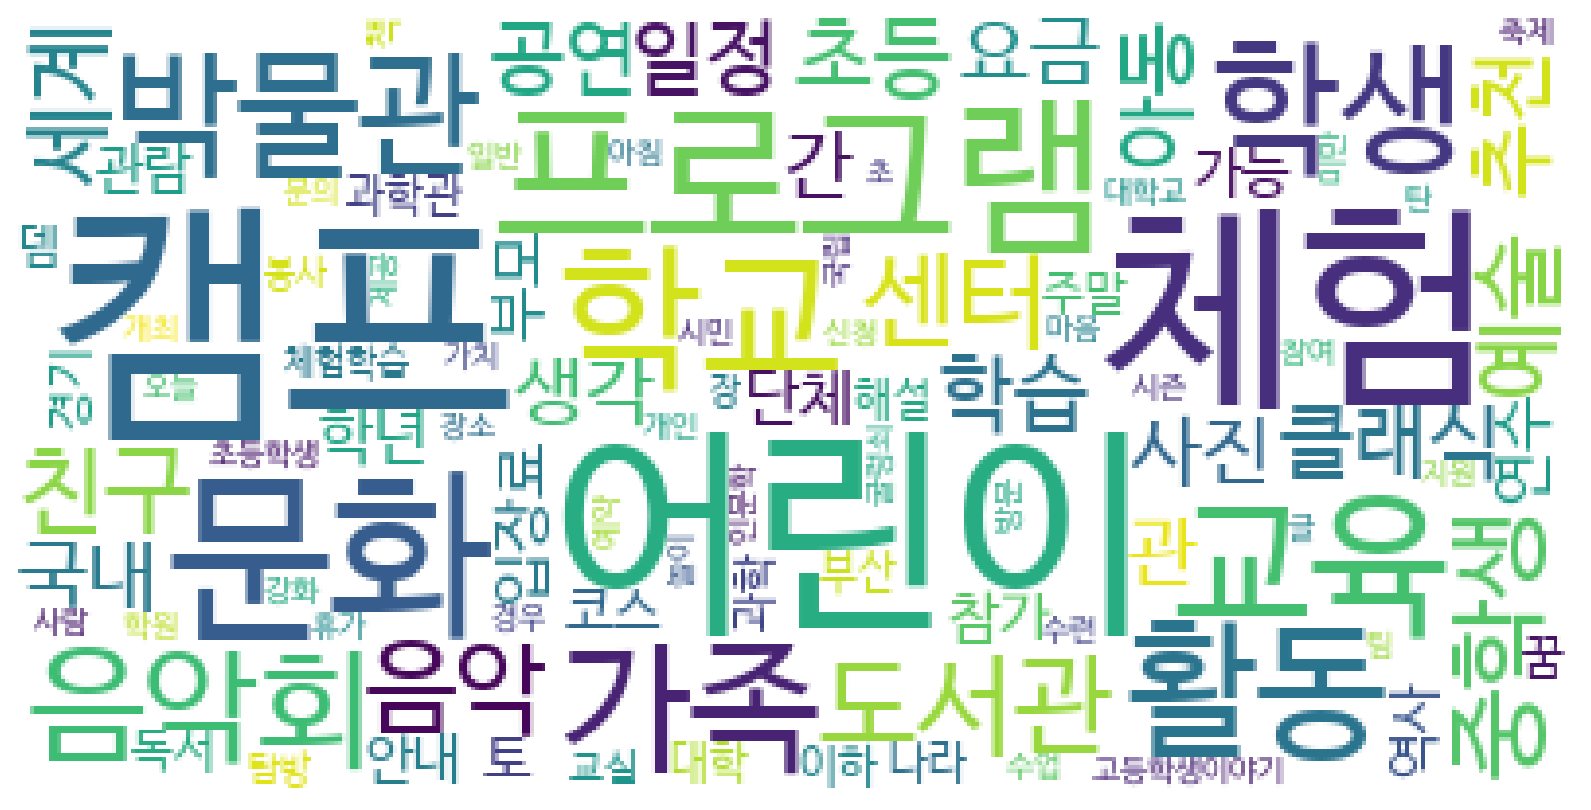

In [78]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()
